# Stock Market Analysis for Tech Stocks

In this project, I'll analyse data from the stock market for some technology stocks. 

Again, I'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history. 

Here are the questions I'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behaviour?

In [2]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [3]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [4]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [8]:
import yfinance as yf

tech_list = ['AAPL','GOOGL','MSFT','AMZN']  # Example list of tech stock symbols
start = '2020-01-01'  # Example start date
end = '2020-12-31'    # Example end date

for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [9]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200


In [10]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,95.113651,96.510665,93.762768,95.198889,93.128732,1.577966e+08
std,21.918692,22.007232,21.490245,21.725222,21.461740,6.987198e+07
min,57.020000,57.125000,53.152500,56.092499,54.706993,4.669130e+07
25%,76.971251,78.111252,76.183126,77.383127,75.309464,1.113394e+08
50%,91.264999,92.793751,90.738750,91.421249,89.404465,1.381294e+08
75%,115.808125,117.265001,114.129997,115.718122,113.369390,1.875871e+08
max,138.050003,138.789993,134.339996,136.690002,134.146667,4.265100e+08


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [11]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


No missing info in the dataframe above, so we can go about our business.

### What's the change in stock's price over time?

<Axes: xlabel='Date'>

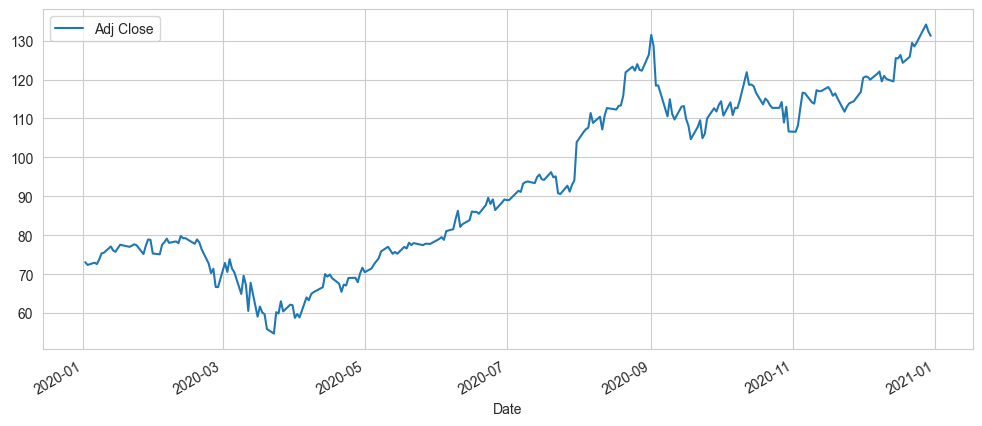

In [12]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

<Axes: xlabel='Date'>

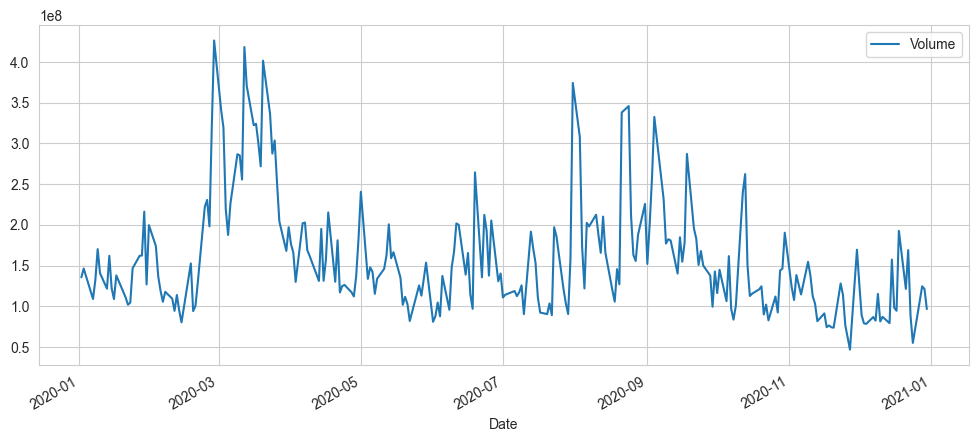

In [13]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. I'll add that information to the stock's dataframe.

In [14]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [15]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523254,88223700,124.592782,121.796793,117.231162
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514465,54930100,125.449538,122.578963,117.446848
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146667,124486200,126.850968,123.565265,117.764582
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360489,121047300,128.135609,124.341545,118.079706
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231888,96452100,128.708741,124.881311,118.431825


<Axes: xlabel='Date'>

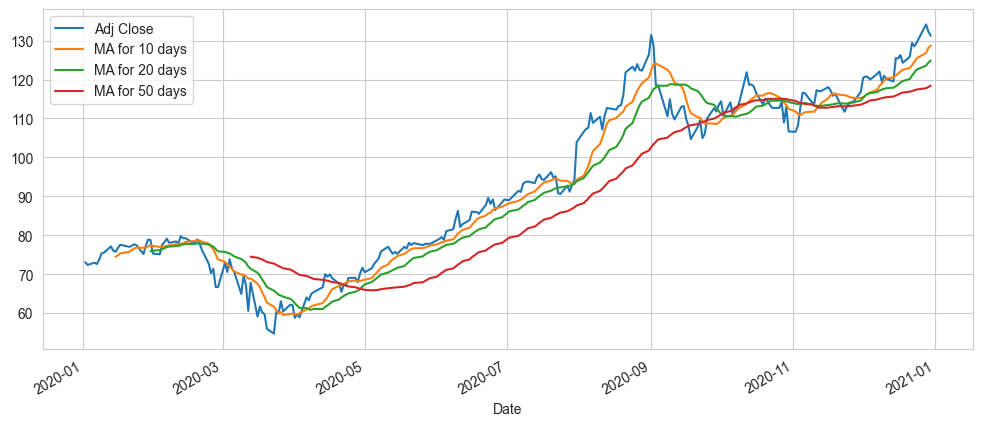

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### What was the daily return average of a stock?

In [17]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [18]:
AAPL['Daily Return'].tail()

Date
2020-12-23   -0.006976
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

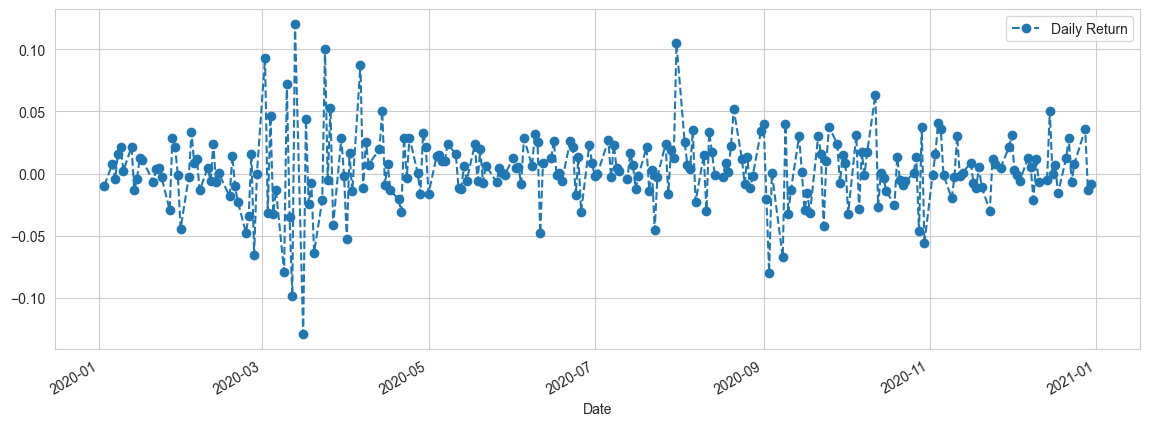

In [19]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

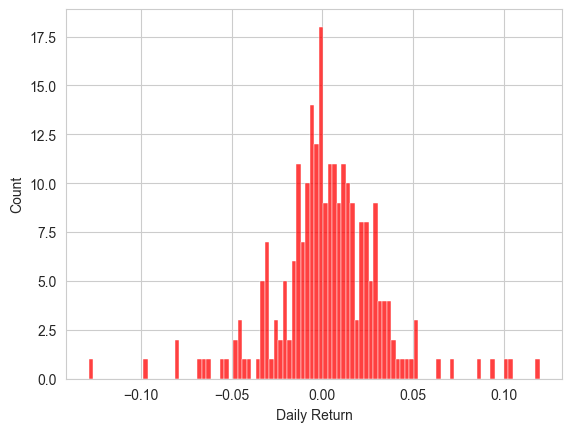

In [20]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [29]:
import yfinance as yf

tech_list = ['AAPL','GOOGL','MSFT','AMZN']  # Example list of tech stock symbols
start = '2020-01-01'  # Example start date
end = '2020-12-31'    # Example end date

# Downloading stock data
data = yf.download(tech_list, start=start, end=end)

# Extracting the 'Adj Close' prices
close_df = data['Adj Close']


[                       0%%                      ]

[*********************100%%**********************]  4 of 4 completed


In [30]:
close_df.tail()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-12-23,128.523254,159.263504,86.411499,214.842224
2020-12-24,129.514465,158.634506,86.708000,216.523849
2020-12-28,134.146667,164.197998,88.697998,218.672104
2020-12-29,132.360489,166.100006,87.888000,217.884750
2020-12-30,131.231888,164.292496,86.812500,215.483749


Everything works as expected. 

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [31]:
rets_df = close_df.pct_change()

In [32]:
rets_df.tail()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-12-23,-0.006976,-0.006627,0.004656,-0.013039
2020-12-24,0.007712,-0.003949,0.003431,0.007827
2020-12-28,0.035766,0.035071,0.022951,0.009922
2020-12-29,-0.013315,0.011584,-0.009132,-0.003601
2020-12-30,-0.008527,-0.010882,-0.012237,-0.011020


Let's try creating a scatterplot to visualise any correlations between different stocks. First I'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

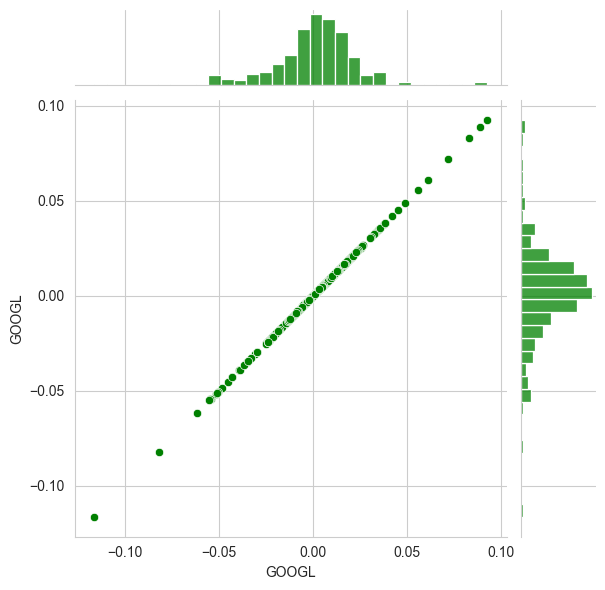

In [40]:
import seaborn as sns

# Assuming rets_df is a DataFrame where columns are stock symbols and rows are daily return percentages
sns.jointplot(x='GOOGL', y='GOOGL', data=rets_df, kind='scatter', color='green')


As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

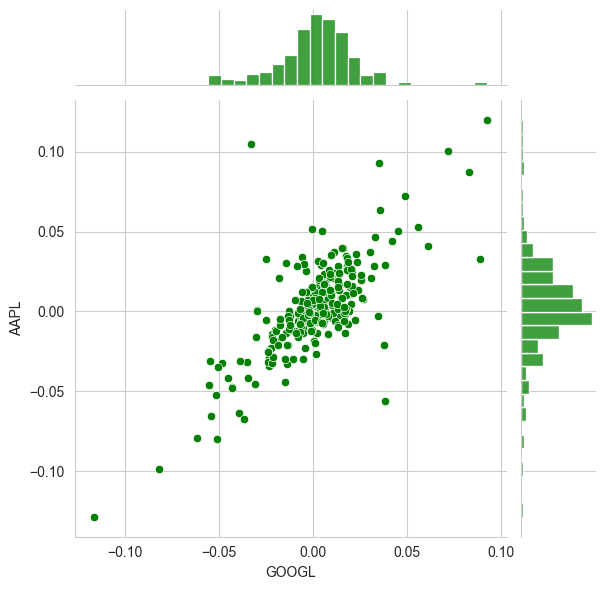

In [38]:
import seaborn as sns

# Assuming rets_df is a DataFrame where columns are stock symbols and rows are daily return percentages
sns.jointplot(x='GOOGL', y='AAPL', data=rets_df, kind='scatter', color='green')


There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

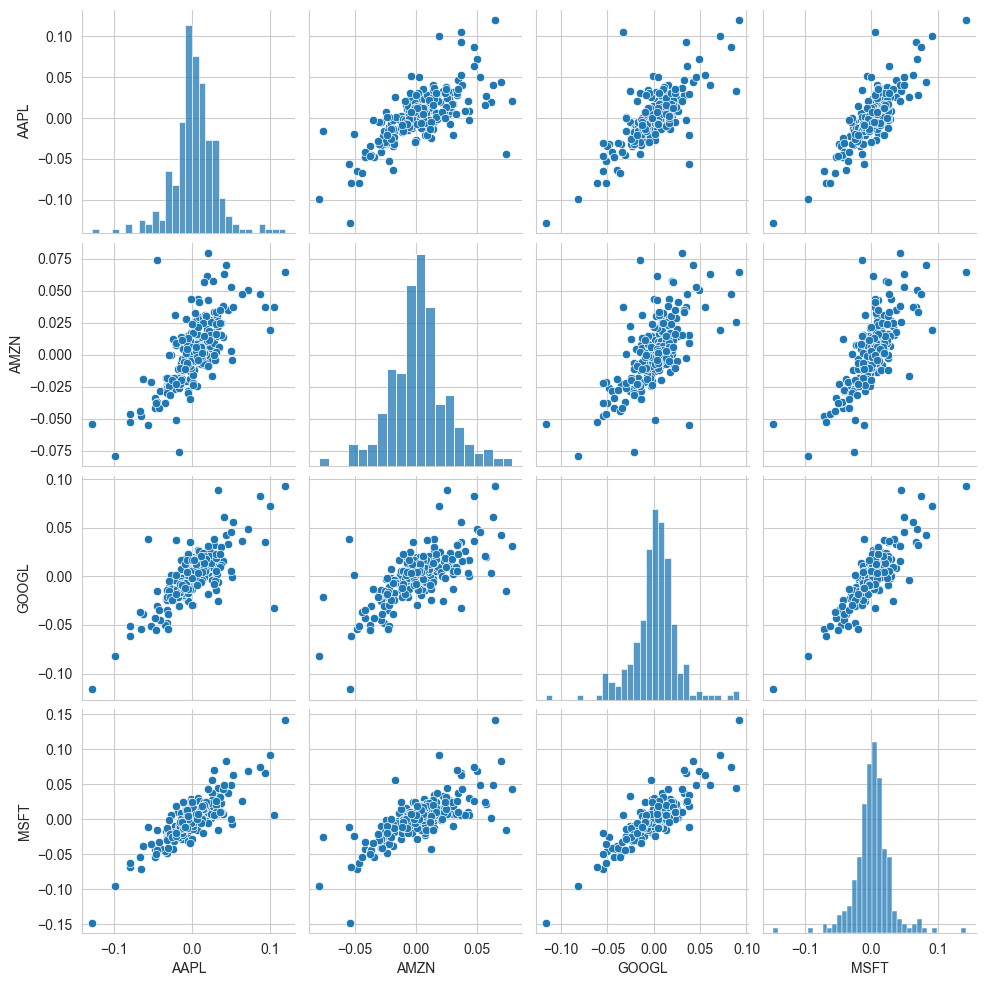

In [41]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<Axes: xlabel='Ticker', ylabel='Date'>

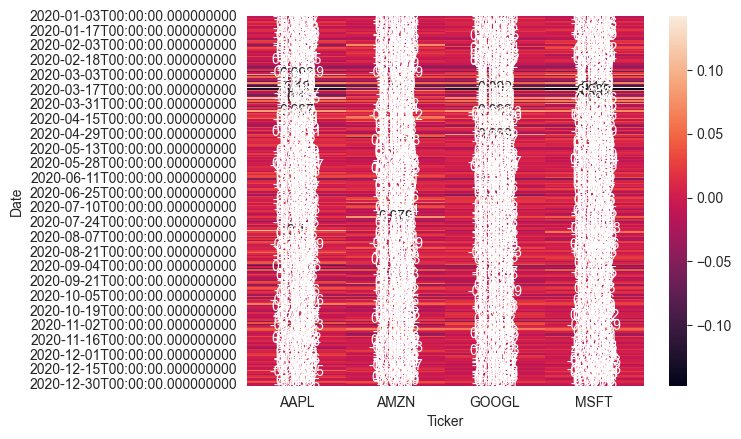

In [42]:
sns.heatmap(rets_df.dropna(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [43]:
rets = rets_df.dropna()

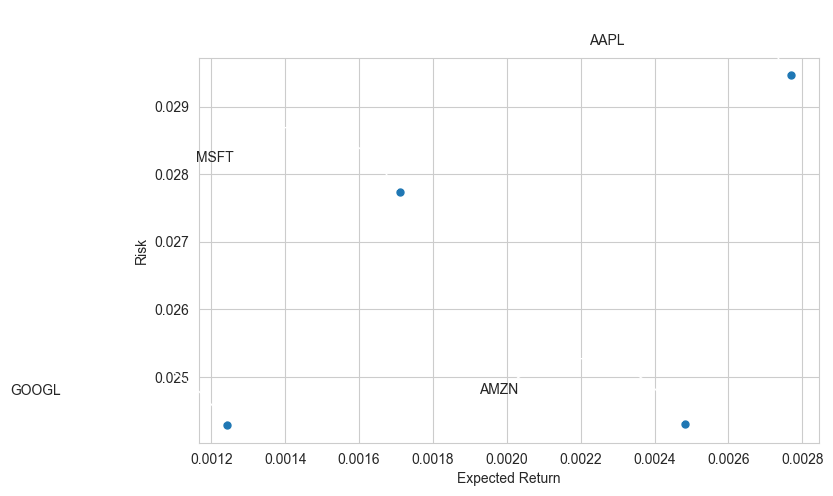

In [44]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. I'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<Axes: xlabel='Daily Return', ylabel='Count'>

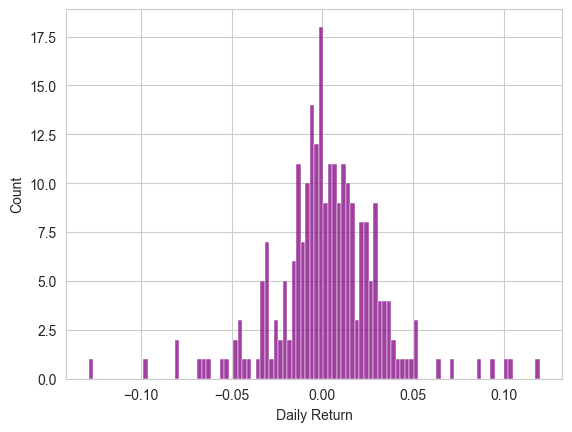

In [45]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [46]:
rets.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-01-03,-0.009722,-0.012139,-0.005231,-0.012452
2020-01-06,0.007968,0.014886,0.026654,0.002585
2020-01-07,-0.004703,0.002092,-0.001932,-0.009118
2020-01-08,0.016086,-0.007809,0.007118,0.015928
2020-01-09,0.021241,0.004799,0.010498,0.012493


In [47]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.04492768962022409

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

Check out this [link](http://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.


In [48]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [49]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [51]:
GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

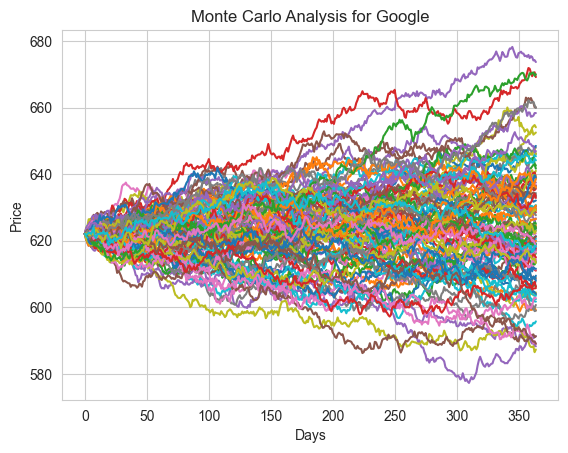

In [52]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [53]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

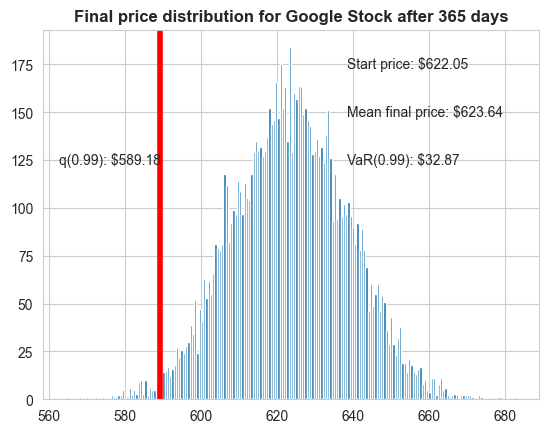

In [54]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD623.36.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.

SUJITH REDDY